# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [6]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [7]:
%run data_evaluation.ipynb

In [8]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Get test and train data

In [9]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.0, 0.2)

In [10]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 2588 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 13 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 183 rows -> systolic bp too low.
Dropped 46 rows -> systolic bp too high.
Dropped 38 rows -> diastolic bp too low.
Dropped 904 rows -> diastolic bp too high.
Dropped 98 rows -> sytolic bp was lower than diastolic.


D:\Programms\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


# Model without tuning

## Create and train the model

In [11]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation

## Prediction

In [12]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)
y_proba = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.7326223432418123

Precision Score:
0.7479888359875225

Recall Score:
0.6949359365466748

F1-Score:
0.7204870720328931

Cost:
5535



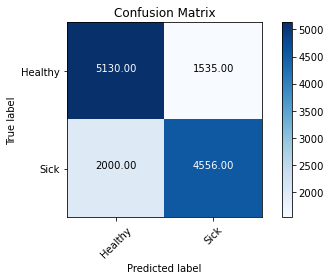

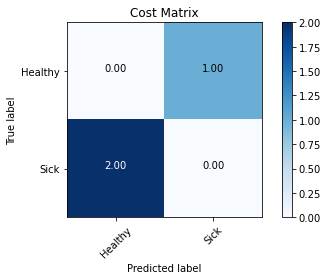

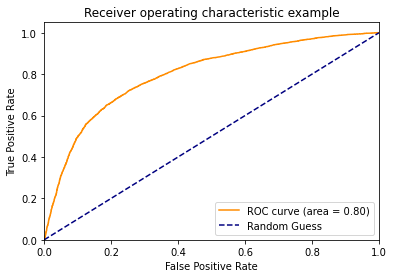


ROC Score:
0.7993365028261337


In [13]:
show_evaluation(y_test, y_pred, y_proba)

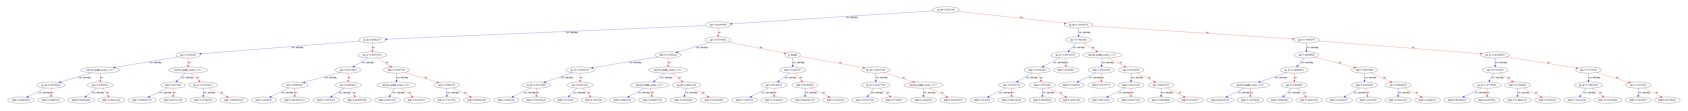

In [14]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

# Model(s) with tuning

### Tune max_depth and min_child_weight

In [15]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([21.90386305, 20.75846791, 19.44398279, 20.93468976,  4.38554807,
          4.30357804,  5.79745488,  5.88283596,  5.69971213,  8.16253653,
          7.71070232,  6.41311431]),
  'std_fit_time': array([1.31801123, 1.36836449, 2.37043098, 4.3672289 , 0.16867054,
         0.12911504, 0.14286379, 0.07874195, 0.12123793, 0.21501967,
         0.17056902, 0.69683433]),
  'mean_score_time': array([0.14664378, 0.15420632, 0.1103169 , 0.09056759, 0.04059272,
         0.04109054, 0.05605235, 0.06482658, 0.07041459, 0.0782958 ,
         0.06682439, 0.07290974]),
  'std_score_time': array([0.04245149, 0.05624596, 0.01219165, 0.07829639, 0.00188238,
         0.00390902, 0.00293342, 0.01465742, 0.02800914, 0.01186697,
         0.00522806, 0.00698109]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [16]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([2.94527006, 2.51847701, 2.41175632, 3.13954425, 2.80921082,
         2.84012747, 3.52113795, 3.71491685, 3.46318121]),
  'std_fit_time': array([0.12654641, 0.14592619, 0.07561217, 0.06447527, 0.02508413,
         0.03670866, 0.07904941, 0.14640542, 0.8378135 ]),
  'mean_score_time': array([0.05335979, 0.03550725, 0.03969402, 0.03440971, 0.03271236,
         0.03540797, 0.0355082 , 0.03729997, 0.03284836]),
  'std_score_time': array([0.01998301, 0.00751492, 0.01123778, 0.00380974, 0.00395931,
         0.00454981, 0.00353485, 0.00293167, 0.00355596]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         

In [17]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([2.35400949, 2.26364088, 2.27630897, 2.32578039, 3.00489678,
         3.82963824, 3.67345004, 3.41023583, 3.77278333, 3.76140475,
         3.47675233, 3.43874965]),
  'std_fit_time': array([0.05221986, 0.0087099 , 0.05860222, 0.01982445, 0.113605  ,
         0.62246634, 0.66281388, 0.13277246, 0.11574642, 0.31566781,
         0.07248412, 0.05053771]),
  'mean_score_time': array([0.03769927, 0.04408278, 0.03789864, 0.0335103 , 0.03550525,
         0.05066767, 0.04508276, 0.0433856 , 0.04418516, 0.04288888,
         0.04438696, 0.03949404]),
  'std_score_time': array([0.00897426, 0.00593087, 0.00843886, 0.00701204, 0.0052623 ,
         0.0107471 , 0.00761594, 0.00715043, 0.0059847 , 0.00563239,
         0.00783803, 0.01050926]),
  'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

### Tune gamma

In [18]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([3.40244946, 3.86334233, 3.88119478, 4.89394617, 4.8128026 ]),
  'std_fit_time': array([0.13768757, 0.18340018, 0.16628275, 0.56357086, 1.49127381]),
  'mean_score_time': array([0.05146246, 0.0610405 , 0.04857807, 0.05395803, 0.04349537]),
  'std_score_time': array([0.01689697, 0.01527485, 0.00526656, 0.00916605, 0.00891576]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.79549021, 0.79547108, 0.79522181, 0.79522045, 0.79521872]),
  'split1_test_score': array([0.79153802, 0.79142033, 0.79147424, 0.79147696, 0.79144459]),
  'split2_test_score': array([0.79894188, 0.7989741 , 0.79893128, 0.79888053, 0.79899713]),
  'split3_test_score': array([0.79213272, 0.79224601, 0.79200136, 0.79202865, 0.79203621]),

### Recheck model

In [19]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)
y_proba1 = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.7368580288934271

Precision Score:
0.7554374896231114

Recall Score:
0.6940207443563148

F1-Score:
0.7234279354479688

Cost:
5485



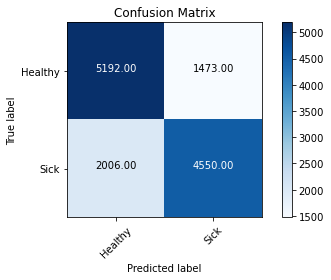

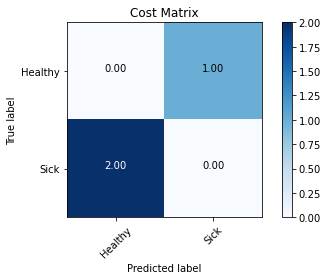

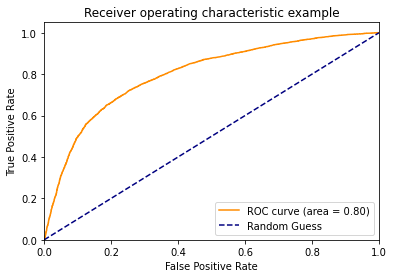


ROC Score:
0.7993365028261337


In [20]:
show_evaluation(y_test, y_pred1, y_proba1)

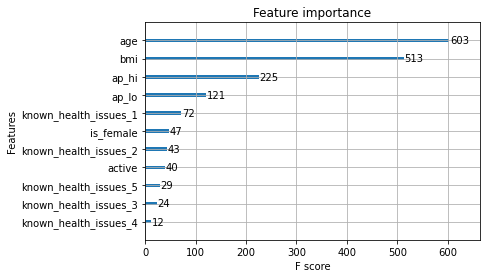

In [21]:
xgb.plot_importance(model1)

### Tune subsample and colsample_bytree

In [22]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([ 5.61313424,  5.8701756 ,  5.11616192,  4.40701356,  6.33901467,
          5.80064602, 16.15680695, 31.60110059, 35.97943606, 36.33601251,
         29.85039577, 25.28193989, 29.17789512, 26.73695049, 13.42109618,
          5.26169467]),
  'std_fit_time': array([0.28961798, 0.44142803, 0.18184984, 0.28573749, 0.06915833,
         0.58621625, 8.98830507, 2.90552967, 1.49754676, 2.95279061,
         2.47605542, 1.02002047, 0.81739468, 0.66598204, 9.28998351,
         0.30424678]),
  'mean_score_time': array([0.06852355, 0.06423082, 0.06303525, 0.04647579, 0.06862421,
         0.0544538 , 0.1693562 , 0.20855298, 0.15384917, 0.17239141,
         0.14688606, 0.15304365, 0.17970243, 0.11297169, 0.04612379,
         0.04936948]),
  'std_score_time': array([0.01995496, 0.0100314 , 0.01098521, 0.00712533, 0.00739349,
         0.01394272, 0.1165754 , 0.0691037 , 0.03978675, 0.03432985,
         0.01287131, 0.03082414, 0.05757976, 0.05398223, 0.00472481,
         0.012735

In [23]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([3.52789588, 3.49770832, 3.50379434, 3.7166389 , 3.93487306,
         3.70834708, 3.77656608, 3.75820379, 3.57302403]),
  'std_fit_time': array([0.06172216, 0.12086832, 0.09653209, 0.08392062, 0.10696451,
         0.06918705, 0.04296901, 0.04497619, 0.92681838]),
  'mean_score_time': array([0.05385661, 0.0455792 , 0.03600597, 0.04318566, 0.04875493,
         0.037499  , 0.03879809, 0.0379992 , 0.04388304]),
  'std_score_time': array([0.01403411, 0.00604583, 0.00418961, 0.00661363, 0.0135459 ,
         0.00486977, 0.00539209, 0.00316094, 0.01151034]),
  'param_colsample_bytree': masked_array(data=[0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.75, 0.75, 0.75],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, Fals

### Tune regularization parameters

In [24]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([4.62435646, 3.89167876, 4.13453422, 3.72320523, 3.24145551]),
  'std_fit_time': array([0.38441883, 0.03768126, 0.15820663, 0.30176877, 0.95808732]),
  'mean_score_time': array([0.07041612, 0.04807138, 0.04338608, 0.04558024, 0.03849664]),
  'std_score_time': array([0.01753983, 0.00700721, 0.00698177, 0.0079633 , 0.00972233]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.79535576, 0.79540436, 0.79532159, 0.79542174, 0.7947546 ]),
  'split1_test_score': array([0.79164722, 0.79155369, 0.79151714, 0.79186013, 0.79075268]),
  'split2_test_score': array([0.79831068, 0.79827658, 0.79843704, 0.79869779, 0.79721579]),
  'split3_test_score': array([0.7918249 , 0.7916888 , 0.79189204,

In [25]:
param_test7 = {
 'reg_alpha':[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([3.40862846, 3.57918839, 3.95529575, 4.02313046, 3.61429029,
         4.15776591, 3.75531917]),
  'std_fit_time': array([0.01923546, 0.05819939, 0.23103555, 0.11490421, 0.115793  ,
         0.27758009, 0.5540811 ]),
  'mean_score_time': array([0.06223893, 0.04637423, 0.04647536, 0.04926891, 0.04568143,
         0.04049692, 0.04039378]),
  'std_score_time': array([0.01740356, 0.00853096, 0.00706878, 0.01713111, 0.00582123,
         0.00563668, 0.00782704]),
  'param_reg_alpha': masked_array(data=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.5},
   {'reg_alpha': 0.75},
   {'reg_alpha': 1},
   {'reg_alpha': 1.25},
   {'reg_alpha': 1.5},
   {'reg_alpha': 1.75},
   {'reg_alpha': 2}],
  'split0_test_score': array([0.79501484, 0.79555524, 0.79542174, 0.79557584, 0.79544543,
         0.7954516 , 0.79539898]),
  'split1_test_sco

### Recheck model

In [26]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=8, 
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.7,
    reg_alpha=1.75,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)
y_proba2 = model2.predict_proba(x_test)[:,1]

Accuracy Score:
0.7358747447243023

Precision Score:
0.7535584243627937

Recall Score:
0.6944783404514948

F1-Score:
0.7228131449436419

Cost:
5495



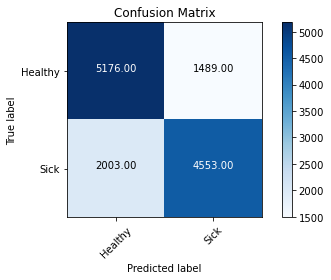

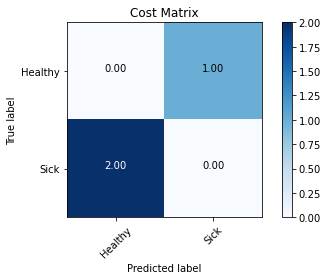

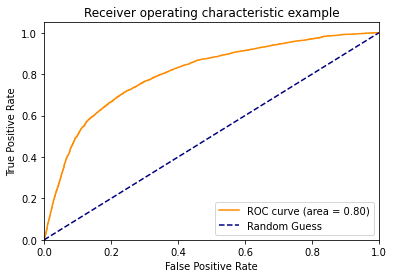


ROC Score:
0.803079098786289


In [27]:
show_evaluation(y_test, y_pred2, y_proba2)

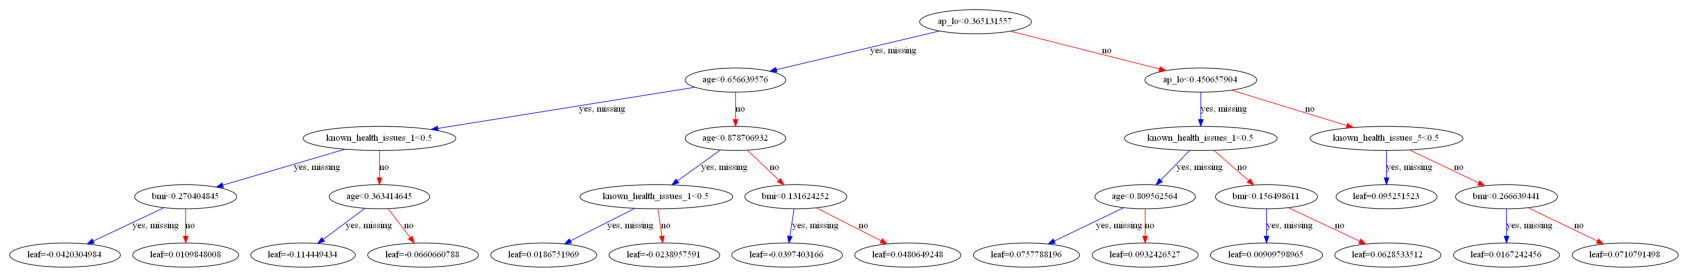

In [28]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model2, num_trees=4, ax=ax)
plt.show()

## Most important variables

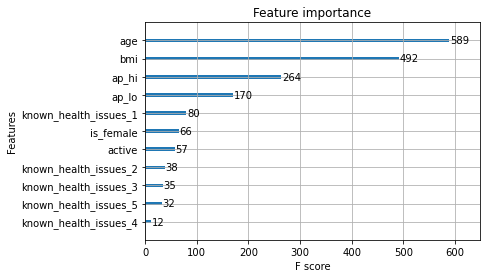

In [29]:
xgb.plot_importance(model2)


### Change learning rate

In [30]:
model3 = XGBClassifier( 
    learning_rate=0.02, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=8, 
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.7,
    reg_alpha=1.75,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model3.fit(x_train,y_train)


y_prob3 = model3.predict(x_test.astype('float32'))
y_pred3 = np.round(y_prob3)
y_proba3 = model3.predict_proba(x_test)[:,1]

Accuracy Score:
0.735950381968081

Precision Score:
0.7629095899811288

Recall Score:
0.6783099450884685

F1-Score:
0.7181267662494953

Cost:
5600



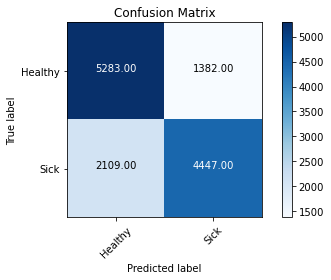

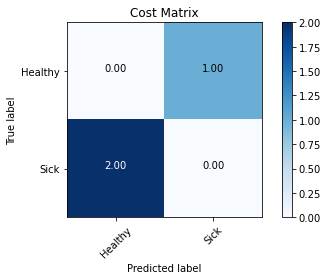

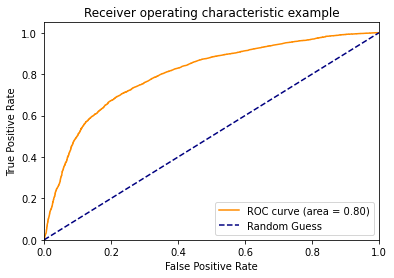


ROC Score:
0.802771322787988


In [31]:
show_evaluation(y_test, y_pred3, y_proba3)

### Save predictions

In [32]:
# Save predictions
method_name = 'XGBoost'
predicted_probabilities = y_proba2
savePredictedProbabilities(method_name, y_test, predicted_probabilities)